In [ ]:
# importing  the libraries
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [14]:
# Relu Activation Function and softmax
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_values = np.exp(x-np.max(x, axis=1, keepdims=True))
    return exp_values/np.sum(exp_values, axis=1, keepdims=True)

In [15]:
# layer_dense class
class layer_dense:
    def __init__(self, n_inputs, n_neurons, learning_rate=0.01):
        self.weights = np.random.randn(n_inputs, n_neurons) * np.sqrt(2 / n_inputs) # Creating random weights
        self.biases = np.zeros((1, n_neurons))
        self.learning_rate = learning_rate

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases # z = x * w + b

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues) # dL/dw = dL/dz*dz/dw
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

        self.weights -= self.learning_rate * self.dweights # Updating weights and biases
        self.biases -= self.learning_rate * self.dbiases

In [16]:
# loss calculation for catagorical dataset using cross entropy (class)
class LossCategoricalCrossEntropy:
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)  # clip values to prevent division by zero

        if len(y_true.shape) == 1:  # if one-hot encoded
            correct_confidences = y_pred_clipped[range(samples), y_true]
        else:  
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        return -np.mean(np.log(correct_confidences))

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 1:
            
            # np.eye(2, dtype=int)
            # array([[1, 0],
            #     [0, 1]])

            # np.eye(3, k=1)
            # array([[0.,  1.,  0.],
            #     [0.,  0.,  1.],
            #     [0.,  0.,  0.]])
            
            y_true = np.eye(dvalues.shape[1])[y_true]  # np.eye means identity matrix
        self.dinputs = (dvalues - y_true) / samples

In [27]:
# spiral dataset from nnf with X as input and y as output
def spiral_data(samples, classes):
    np.random.seed(0)
    X = np.zeros((samples * classes, 2))
    y = np.zeros(samples * classes, dtype=int)
    for class_number in range(classes):
        ix = range(samples * class_number, samples * (class_number + 1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, samples) + np.random.randn(samples) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y

X , y = spiral_data(samples=100, classes=3)
# y is a one hot encoded vector

In [28]:
# 3 layers not nessory but for better understanding


layer1 = layer_dense(2, 4, learning_rate=0.01)
layer2 = layer_dense(4, 4, learning_rate=0.01)
layer3 = layer_dense(4, 3, learning_rate=0.01)

In [29]:
# loss function
loss_function = LossCategoricalCrossEntropy()

In [30]:
# little bit of ploting
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    layer1.forward(grid_points)
    layer1.output = relu(layer1.output)

    layer2.forward(layer1.output)
    layer2.output = relu(layer2.output)

    layer3.forward(layer2.output)
    predictions = np.argmax(softmax(layer3.output), axis=1)
    predictions = predictions.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors="k")
    plt.title("Classification Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Epoch 0, Loss: 1.0870, Accuracy: 0.3367
Epoch 50, Loss: 1.0470, Accuracy: 0.3700
Epoch 100, Loss: 1.0297, Accuracy: 0.4067
Epoch 150, Loss: 1.0162, Accuracy: 0.4133
Epoch 200, Loss: 1.0046, Accuracy: 0.4500
Epoch 250, Loss: 0.9930, Accuracy: 0.4800
Epoch 300, Loss: 0.9812, Accuracy: 0.5167
Epoch 350, Loss: 0.9693, Accuracy: 0.5467
Epoch 400, Loss: 0.9574, Accuracy: 0.5700
Epoch 450, Loss: 0.9450, Accuracy: 0.5733
Epoch 500, Loss: 0.9323, Accuracy: 0.5833
Epoch 550, Loss: 0.9195, Accuracy: 0.5933
Epoch 600, Loss: 0.9070, Accuracy: 0.5967
Epoch 650, Loss: 0.8946, Accuracy: 0.6133
Epoch 700, Loss: 0.8819, Accuracy: 0.6167
Epoch 750, Loss: 0.8691, Accuracy: 0.6300
Epoch 800, Loss: 0.8568, Accuracy: 0.6400
Epoch 850, Loss: 0.8443, Accuracy: 0.6367
Epoch 900, Loss: 0.8318, Accuracy: 0.6467
Epoch 950, Loss: 0.8200, Accuracy: 0.6467
Epoch 1000, Loss: 0.8087, Accuracy: 0.6467
Epoch 1050, Loss: 0.7977, Accuracy: 0.6500
Epoch 1100, Loss: 0.7868, Accuracy: 0.6633
Epoch 1150, Loss: 0.7763, Accuracy

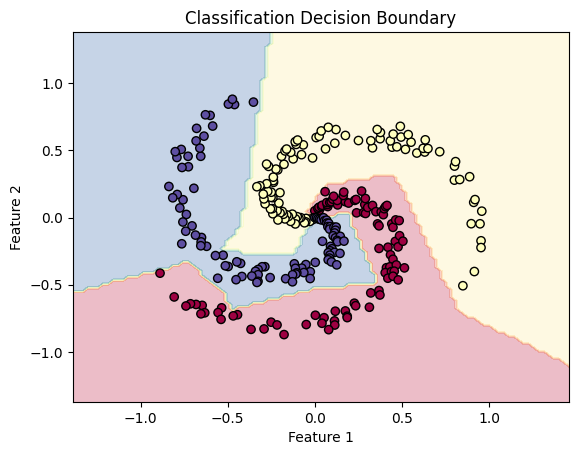

In [31]:
# And the most important part training the neural network
# Train the model

epochs = 100000 # this much epochs is more then enough for 99 % accuracy
for epoch in range(epochs):
    # Forward pass
    layer1.forward(X) # input layer
    layer1.output = relu(layer1.output)

    layer2.forward(layer1.output)# hidden layer output is the input for the next layer
    layer2.output = relu(layer2.output)

    layer3.forward(layer2.output)
    layer3.output = softmax(layer3.output)

    # Loss calculation
    loss = loss_function.forward(layer3.output, y) # using last layer output and y

    # Accuracy
    predictions = np.argmax(layer3.output, axis=1) # accuracy is the number of correct predictions
    accuracy = np.mean(predictions == y)

    # Backward pass
    loss_function.backward(layer3.output, y)
    layer3.backward(loss_function.dinputs) 

    dvalues = relu_derivative(layer2.output) * layer3.dinputs # using last layer output and y
    layer2.backward(dvalues)

    dvalues = relu_derivative(layer1.output) * layer2.dinputs
    layer1.backward(dvalues)

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Plot classification boundary
plot_decision_boundary(layer3, X, y) # plot the decision boundary
